# Titanic Solution Using Speedml

### This notebook uses the [Speedml](https://speedml.com)  Python package to speed start machine learning projects.

Speedml integrates best ML packages and popular strategies used by top data scientists in an easy to use Python package.

> Using Speedml on Titanic dataset we **quickly jumped from low 80% rank to top 20% rank**, within just a few feature engineering iterations.

Speedml is under active development and Kaggle version of the API may not be the latest. For demonstrating the latest Speedml features we have also created the same notebook on GitHub.

### Download the latest version of [this notebook from GitHub](https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb).

### Table of Contents

- Loading the datasets.
- Differentiating between numerical, categorical, high-cardinality, and continuous features.
- Feature correlation heatmap matrix.
- Feature distribution for outliers detection.
- Plotting continuous features for outliers detection.
- Plotting categorical features for outliers detection.
- Fixing outliers with a single line of code.
- Plotting continuous features against categorical features.
- Feature engineering for high-cardinality.
- New feature extraction from existing features.
- Hyper-parameters tuning for model classifier.
- Model evaluation and accuracy ranking.
- Model prediction and feature selection.
- Saving the results.

## Getting Started

To get started all you need to do is include one package in your project. Speedml includes pandas, sklearn, numpy, xgboost, by default so you do not need to import these.

In [24]:
from speedml import Speedml

%matplotlib inline

It takes one line of code to initialize train, test datasets, define the target and unique id variables. This also initializes wrapper components for EDA (sml.plot), XGBoost (sml.xgb), modeling (sml.model), feature engineering (sml.feature) and more...

In [25]:
sml = Speedml('../input/train.csv', 
              '../input/test.csv', 
              target = 'Survived',
              uid = 'PassengerId')

You can access pandas directly as a Speedml component.

In [26]:
sml.train.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


## Feature Correlations

You can quickly check feature correlations using a plot. Learn how to interpret this plot at https://speedml.com/plot-correlation-of-features/ 

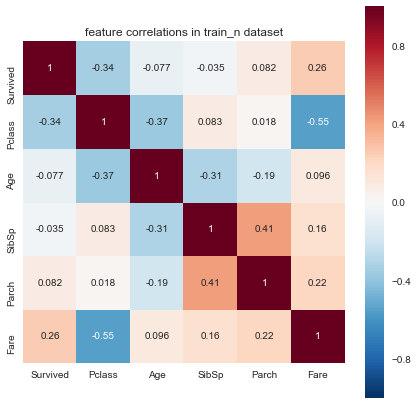

In [27]:
sml.plot.correlate()

## Outliers Detection and Fix

We can use distributions to understand skew (left/right) for determining outliers.

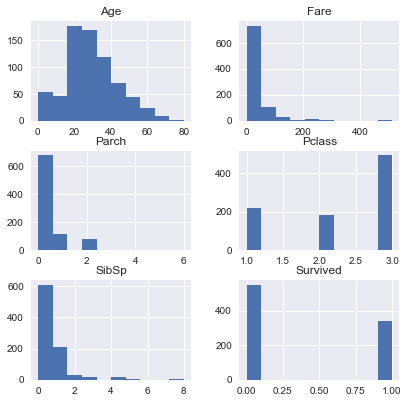

In [28]:
sml.plot.distribute()

Continuous or high-cardinality numerical features are better plotted using scatter plot for determining outliers.

We do not expect outliers in case of Age feature as the distribution plot is fairly close to normal (rising in the middle of x-axis and falling on either sides evenly).

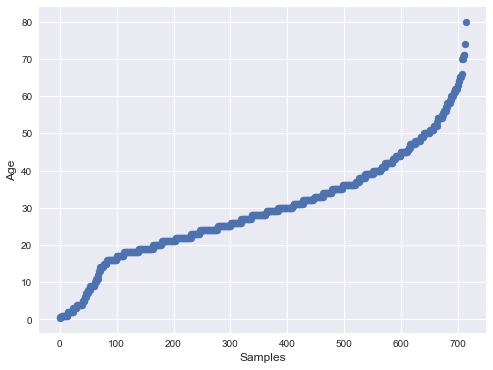

In [29]:
sml.plot.continuous('Age')

The method clearly shows some outliers in case of Fare feature. This coincides with our observation from the distribution plot for the Fare feature which is skewed towards left.

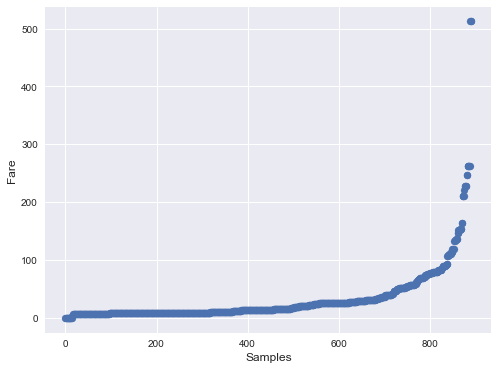

In [30]:
sml.plot.continuous('Fare')

To correct the outliers we fix only values in upper range of the 99th percentile. As the results show these constitute around 1% of overall samples.

In [31]:
sml.feature.outliers('Fare', upper=99)

'9 or 1.01% upper outliers fixed. '

While we impact only a few samples, the outliers fix is fairly significant as shown by the same plot after the fix.

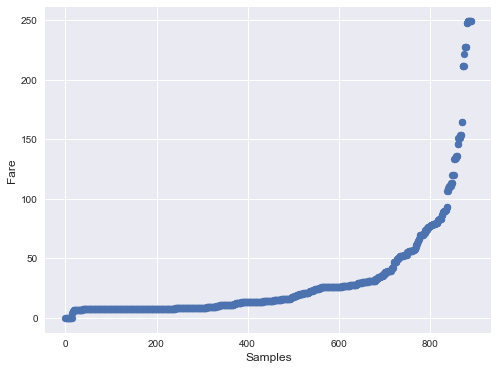

In [32]:
sml.plot.continuous('Fare')

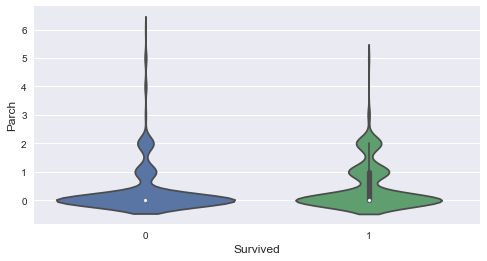

6 or 0.67% upper outliers fixed. 


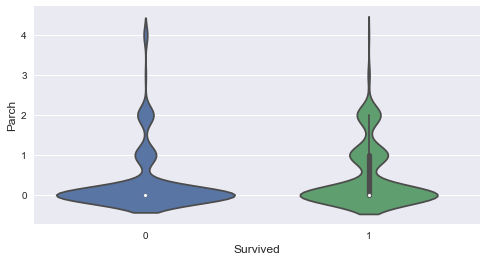

In [33]:
sml.plot.ordinal('Parch')
print(sml.feature.outliers('Parch', upper=99))
sml.plot.ordinal('Parch')

## Feature Engineering For High-Cardinality

High-cardinality features like Ticket and Age are candidates for feature engineering. We use the density method to create a new feature based on Age and Ticket and drop the Ticket feature in turn. This simple iteration improves our model significantly and helps us jump 100s of positions on the Kaggle leaderboard.

In [34]:
sml.feature.density('Age')
sml.train[['Age', 'Age_density']].head()

,Age,Age_density
0,22.0,27
1,38.0,11
2,26.0,18
3,35.0,18
4,35.0,18


In [35]:
sml.feature.density('Ticket')
sml.train[['Ticket', 'Ticket_density']].head()

,Ticket,Ticket_density
0,A/5 21171,1
1,PC 17599,1
2,STON/O2. 3101282,1
3,113803,2
4,373450,1


In [36]:
sml.feature.drop(['Ticket'])

'Dropped 1 features with 12 features available.'

## Extracting New Features

We will now extract new features Deck from Cabin and FamilySize from Parch and SibSp.

In [37]:
sml.plot.crosstab('Survived', 'SibSp')

SibSp,0,1,2,3,4,5,8
Survived,,,,,,,
0,398,97,15,12,15,5,7
1,210,112,13,4,3,0,0


In [38]:
sml.plot.crosstab('Survived', 'Parch')

Parch,0.0,1.0,2.0,3.0,4.0
Survived,,,,,
0,445,53,40,2,9
1,233,65,40,3,1


In [39]:
sml.feature.fillna(a='Cabin', new='Z')
sml.feature.extract(new='Deck', a='Cabin', regex='([A-Z]){1}')
sml.feature.drop(['Cabin'])
sml.feature.mapping('Sex', {'male': 0, 'female': 1})
sml.feature.sum(new='FamilySize', a='Parch', b='SibSp')
sml.feature.add('FamilySize', 1)

In [40]:
sml.plot.crosstab('Survived', 'Deck')

Deck,A,B,C,D,E,F,G,T,Z
Survived,,,,,,,,,
0,8,12,24,8,8,5,2,1,481
1,7,35,35,25,24,8,2,0,206


In [41]:
sml.plot.crosstab('Survived', 'FamilySize')

FamilySize,1.0,2.0,3.0,4.0,5.0,6.0,7.0,8.0,11.0
Survived,,,,,,,,,
0,374,72,43,8,14,20,6,5,7
1,163,89,59,21,3,4,3,0,0


In [42]:
sml.feature.drop(['Parch', 'SibSp'])

'Dropped 2 features with 11 features available.'

Here is a single line of code to impute all empty features values (numerical and text) with numerical median or most common text value.

In [43]:
sml.feature.impute()

'Imputed 179 empty values to 0.'

In [44]:
sml.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 0 to 890
Data columns (total 11 columns):
Age               891 non-null float64
Age_density       891 non-null int64
Deck              891 non-null object
Embarked          891 non-null object
FamilySize        891 non-null float64
Fare              891 non-null float64
Name              891 non-null object
Pclass            891 non-null int64
Sex               891 non-null int64
Survived          891 non-null int64
Ticket_density    891 non-null int64
dtypes: float64(3), int64(5), object(3)
memory usage: 83.5+ KB
----------------------------------------
<class 'pandas.core.frame.DataFrame'>
Int64Index: 418 entries, 0 to 417
Data columns (total 10 columns):
Age               418 non-null float64
Age_density       418 non-null int64
Deck              418 non-null object
Embarked          418 non-null object
FamilySize        418 non-null float64
Fare              418 non-null float64
Name              418 non-null object
Pc

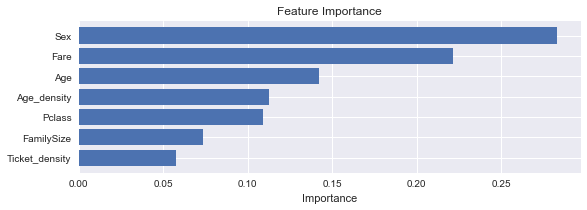

In [45]:
sml.plot.importance()

In [46]:
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Name,Pclass,Sex,Survived,Ticket_density
0,22.0,27,Z,S,2.0,7.2500,"Braund, Mr. Owen Harris",3,0,0,1
1,38.0,11,C,C,2.0,71.2833,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,1,1,1
2,26.0,18,Z,S,1.0,7.9250,"Heikkinen, Miss. Laina",3,1,1,1
3,35.0,18,C,S,2.0,53.1000,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,1,1,2
4,35.0,18,Z,S,1.0,8.0500,"Allen, Mr. William Henry",3,0,0,1


In [47]:
sml.feature.extract(new='Title', a='Name', regex=' ([A-Za-z]+)\.')
sml.plot.crosstab('Title', 'Sex')

Sex,0,1
Title,,
Capt,1,0
Col,2,0
Countess,0,1
Don,1,0
Dr,6,1
Jonkheer,1,0
Lady,0,1
Major,2,0
Master,40,0


In [48]:
sml.feature.replace(a='Title', match=['Lady', 'Countess','Capt', 'Col',\
'Don', 'Dr', 'Major', 'Rev', 'Sir', 'Jonkheer', 'Dona'], new='Rare')

'Replaced matching list of strings across train and test datasets.'

In [49]:
sml.feature.replace('Title', 'Mlle', 'Miss')

'Replaced 2 matching values across train and test datasets.'

In [50]:
sml.feature.replace('Title', 'Ms', 'Miss')
sml.feature.replace('Title', 'Mme', 'Mrs')
sml.train[['Name', 'Title']].head()

,Name,Title
0,"Braund, Mr. Owen Harris",Mr
1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",Mrs
2,"Heikkinen, Miss. Laina",Miss
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",Mrs
4,"Allen, Mr. William Henry",Mr


In [51]:
sml.feature.drop(['Name'])
sml.feature.labels(['Title', 'Embarked', 'Deck'])
sml.train.head()

,Age,Age_density,Deck,Embarked,FamilySize,Fare,Pclass,Sex,Survived,Ticket_density,Title
0,22.0,27,8,2,2.0,7.2500,3,0,0,1,2
1,38.0,11,2,0,2.0,71.2833,1,1,1,1,3
2,26.0,18,8,2,1.0,7.9250,3,1,1,1,1
3,35.0,18,2,2,2.0,53.1000,1,1,1,2,3
4,35.0,18,8,2,1.0,8.0500,3,0,0,1,2


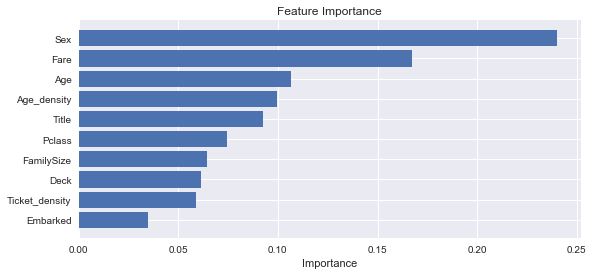

In [316]:
sml.plot.importance()

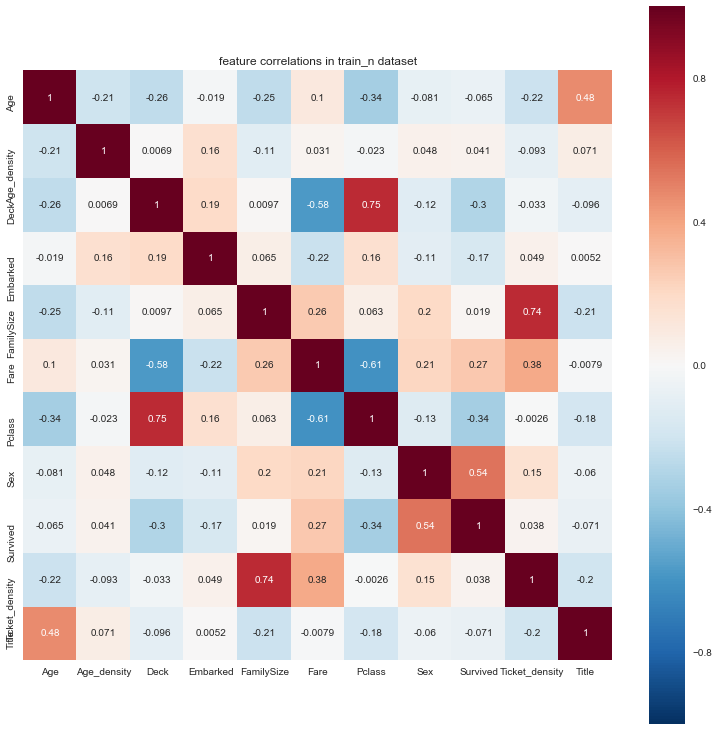

In [317]:
sml.plot.correlate()

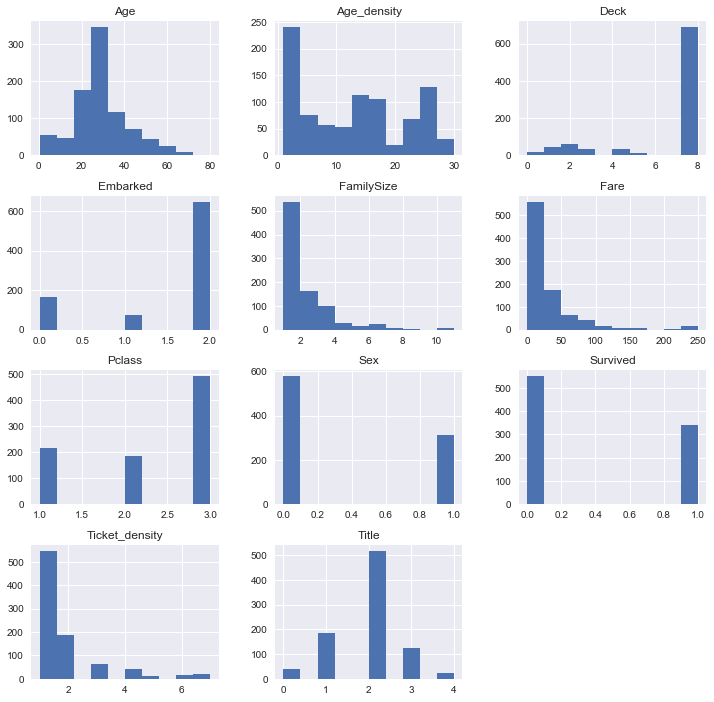

In [318]:
sml.plot.distribute()

### For next steps in the workflow including hyper-parameter tuning, model evaluation, feature selection.

### Download the latest version of [this notebook from GitHub](https://github.com/Speedml/notebooks/blob/master/titanic/titanic-solution-using-speedml.ipynb).